In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import glob
import nibabel as nib
import models


class BratsDataset(Dataset):

    def __init__(self, folder_dir):

        self.folder_dir = folder_dir
        self.image_files = sorted(glob.glob((os.path.join(self.folder_dir, '**/*flair.nii.gz')), recursive = True))
        self.mask_files = sorted(glob.glob((os.path.join(self.folder_dir, '**/*seg.nii.gz')), recursive= True))

    def __len__(self):

        return len(self.image_files)

    def __getitem__(self, idx):
        
        img_path = self.image_files[idx]
        mask_path = self.mask_files[idx]

        image = nib.load(img_path)
        mask = nib.load(mask_path)

        image = np.asanyarray(image.dataobj, dtype=np.float32)
        mask = np.asanyarray(mask.dataobj, dtype=np.float32)

        mask = mask > 0
        mask = mask.astype(np.float32)

        #windowing

        #normalizing
         # flair_normalized = (flair_data - flair_data.mean()) / flair_data.std()

        image = np.expand_dims(image, axis=0)
        mask = np.expand_dims(mask, axis=0)

        image = torch.from_numpy(image)
        mask = torch.from_numpy(mask)

        return image, mask

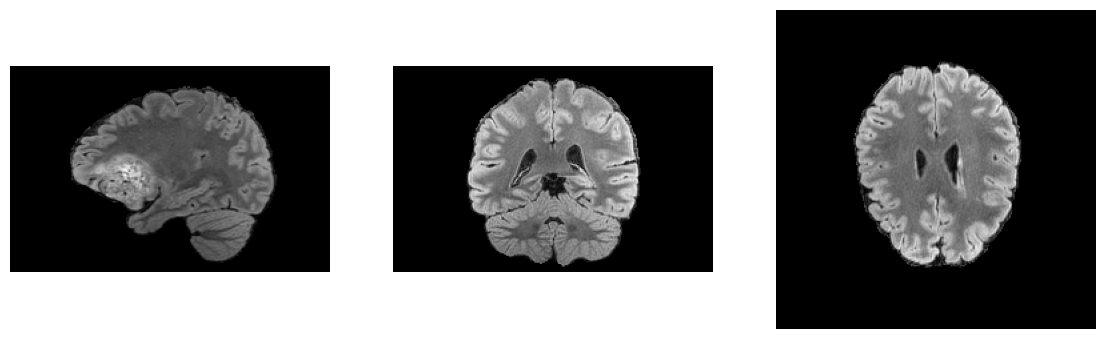

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

image = nib.load('/Users/daniel/Documents/CSAI/Advanced Deep Learning/CODE/data/train/BraTS2021_00000/BraTS2021_00000_flair.nii.gz')
mask = nib.load('/Users/daniel/Documents/CSAI/Advanced Deep Learning/CODE/data/train/BraTS2021_00000/BraTS2021_00000_seg.nii.gz')

image = np.asanyarray(image.dataobj, dtype=np.float32)
mask = np.asanyarray(mask.dataobj, dtype=np.float32)

slicez = image[150, :, :]
slicey = image[:, 150, :]
slicex = image[:, :, 100]

slices = [slicez, slicey, slicex]

fig, axes = plt.subplots(1, 3, figsize=(14, 21))
for i, s in enumerate(slices):
    axes[i].imshow(np.flipud(s.T), cmap='gray')
    axes[i].axis("off")

In [ ]:
import torch 
from torch.utils.data import DataLoader

#data loaders
batch_size = 1 #8

train_path = '/Users/daniel/Documents/CSAI/Advanced Deep Learning/CODE/data/train/'

In [ ]:
import utils
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import models

model = models.Unet3Dbrats()

device = torch.device("cpu")
model = model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5 #1000

x = torch.randn(1, 1, 240, 240, 160)  # Common BRaTS size
try:
    out = model(x)
    print(f"Success! Input: {x.shape}, Output: {out.shape}")
except Exception as e:
    print(f"Error: {e}")